## Group 16 Member: Detao Yu, Freddy Zhao, Jialin Liang

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
from pandas_datareader import data, wb
import geopandas  
from numpy.random import randn
from matplotlib import cm
import seaborn as sns
from matplotlib import dates
import matplotlib.dates as mdates

E:\Anaconda\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
#Data Source: Federal Reserve Bank of New York

t_spread = pd.read_excel('allmonth.xls')
t_spread['Date'] = pd.to_datetime(t_spread['Date'])
t_spread.set_index('Date', inplace = True)

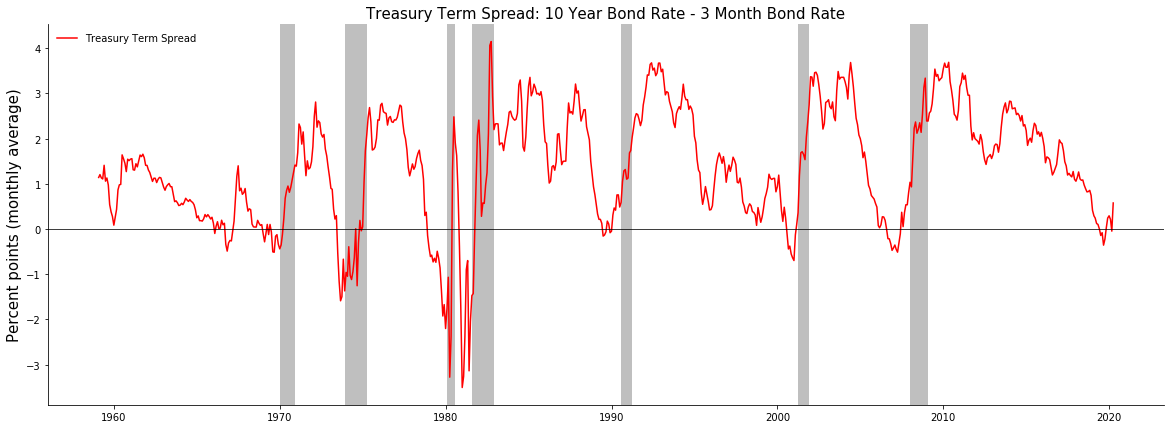

In [3]:
#Plot the term spread

fig, ax = plt.subplots(figsize=(20,7))
ax.plot(t_spread.index, t_spread['Spread'], color='red', label='Treasury Term Spread')

ax.set_title('Treasury Term Spread: 10 Year Bond Rate - 3 Month Bond Rate', fontsize=15)

ax.set_ylabel('Percent points (monthly average)', fontsize=15)
ax.axhline(y=0, color='black', linewidth=0.75)  

plt.axvspan(dt.datetime(2007, 12, 31), dt.datetime(2009, 1, 31), facecolor='0.5', alpha=0.5)
plt.axvspan(dt.datetime(1969, 12, 31), dt.datetime(1970, 11, 30), facecolor='0.5', alpha=0.5)
plt.axvspan(dt.datetime(1973, 11, 30), dt.datetime(1975, 3, 31), facecolor='0.5', alpha=0.5)
plt.axvspan(dt.datetime(1980, 1, 31), dt.datetime(1980, 7, 31), facecolor='0.5', alpha=0.5)
plt.axvspan(dt.datetime(1981, 7, 31), dt.datetime(1982, 11, 30), facecolor='0.5', alpha=0.5)
plt.axvspan(dt.datetime(1990, 7, 31), dt.datetime(1991, 3, 31), facecolor='0.5', alpha=0.5)
plt.axvspan(dt.datetime(2001, 3, 31), dt.datetime(2001, 11, 30), facecolor='0.5', alpha=0.5)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.legend(frameon=False, loc=2)
plt.savefig('D:/UW-Madison/SPRING 2020/ECON 570/Project/Plots/Yield Spread.svg')

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.


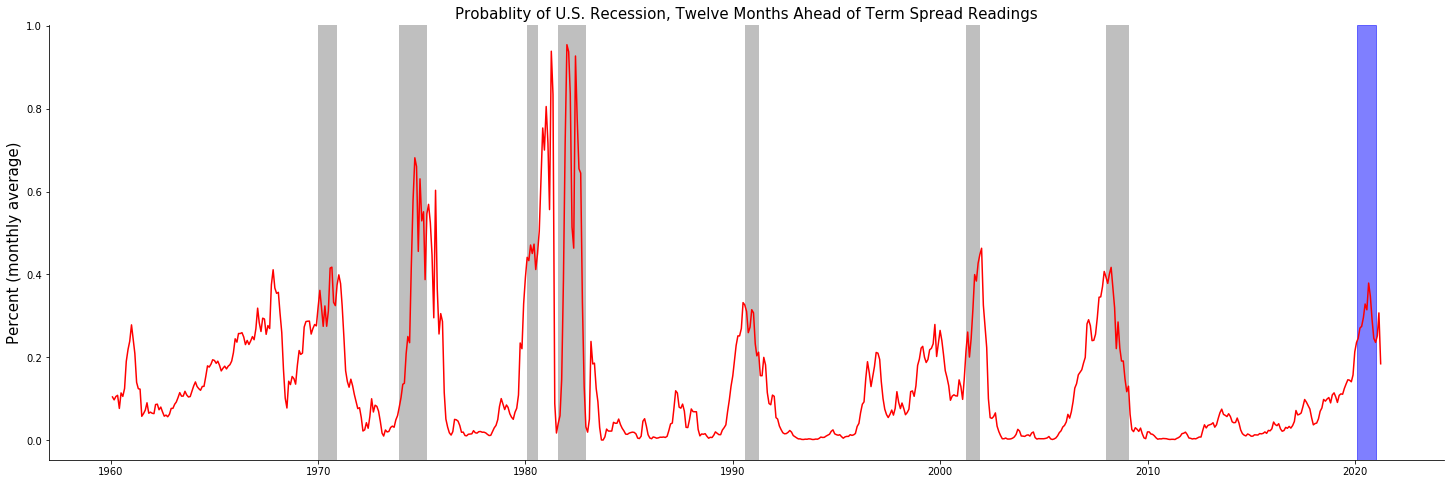

In [4]:
#Data Source: Federal Reserve Bank of New York
#Plot the probability of recession

fig, ax = plt.subplots(figsize=(25,8))

ax.plot(t_spread.index, t_spread['Rec_prob'], color='red')

ax.set_title('Probablity of U.S. Recession, Twelve Months Ahead of Term Spread Readings',fontsize=15)

ax.set_ylabel('Percent (monthly average)',fontsize=15)

plt.axvspan(dt.datetime(2007, 12, 31), dt.datetime(2009, 1, 31), facecolor='0.5', alpha=0.5)
plt.axvspan(dt.datetime(1969, 12, 31), dt.datetime(1970, 11, 30), facecolor='0.5', alpha=0.5)
plt.axvspan(dt.datetime(1973, 11, 30), dt.datetime(1975, 3, 31), facecolor='0.5', alpha=0.5)
plt.axvspan(dt.datetime(1980, 1, 31), dt.datetime(1980, 7, 31), facecolor='0.5', alpha=0.5)
plt.axvspan(dt.datetime(1981, 7, 31), dt.datetime(1982, 11, 30), facecolor='0.5', alpha=0.5)
plt.axvspan(dt.datetime(1990, 7, 31), dt.datetime(1991, 3, 31), facecolor='0.5', alpha=0.5)
plt.axvspan(dt.datetime(2001, 3, 31), dt.datetime(2001, 11, 30), facecolor='0.5', alpha=0.5)
plt.axvspan(dt.datetime(2020, 1, 31), dt.datetime(2020, 12, 31), facecolor='0.5', alpha=0.5, color = 'blue')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.savefig('D:/UW-Madison/SPRING 2020/ECON 570/Project/Plots/Probablity of U.S. Recession.svg')

In [5]:
#Data Source: FRED

unrate = data.DataReader('UNRATE', 'fred', start=dt.datetime(1998, 1, 1))

In [6]:
#Data Source: FRED

init_claim = data.DataReader('ICSA', 'fred', start=dt.datetime(1998, 1, 1))

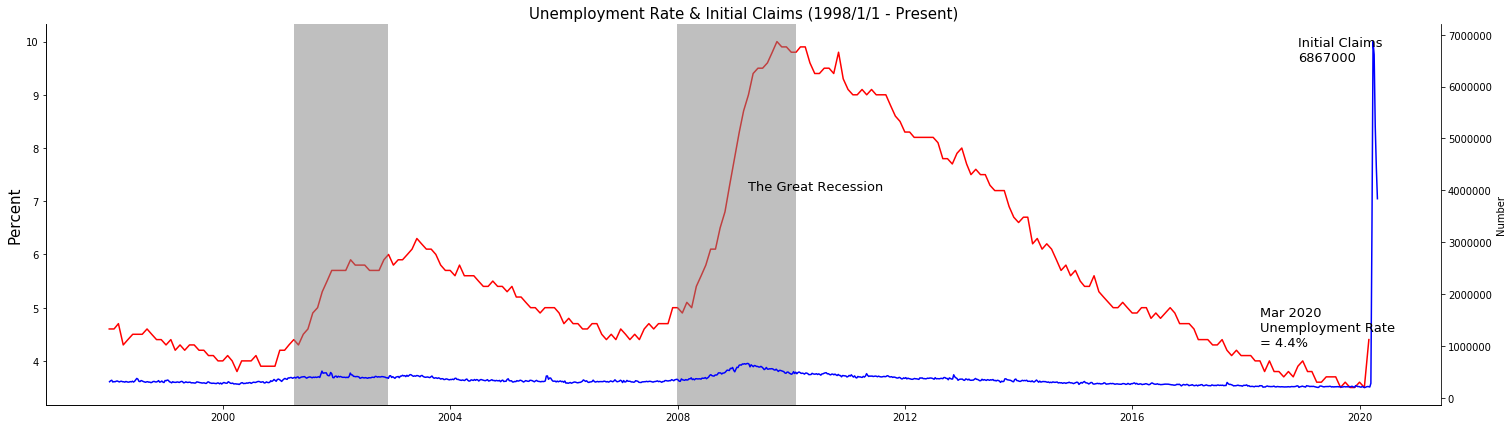

In [7]:
#Plot the unemployment rate

fig, ax = plt.subplots(figsize=(25,7))

ax.plot(unrate.index, unrate['UNRATE'], color='red')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax1 = ax.twinx()
ax1.plot(init_claim.index, init_claim['ICSA'], color='blue')

plt.axvspan(dt.datetime(2007, 12, 31), dt.datetime(2010, 1, 31), facecolor='0.5', alpha=0.5)
plt.axvspan(dt.datetime(2001, 3, 31), dt.datetime(2002, 11, 30), facecolor='0.5', alpha=0.5)

plt.text(dt.datetime(2018, 3, 31), 1000000, 'Mar 2020 \nUnemployment Rate \n= 4.4%',fontsize=13)
ax1.spines['top'].set_visible(False)
ax1.set_ylabel('Number')
plt.text(dt.datetime(2009, 3, 31), 4000000,'The Great Recession',fontsize=13)
plt.text(dt.datetime(2018, 11, 30), 6500000, 'Initial Claims \n6867000', fontsize=13)
ax.set_ylabel('Percent', fontsize=15)
ax.set_title('Unemployment Rate & Initial Claims (1998/1/1 - Present)', fontsize=15)
plt.savefig('D:/UW-Madison/SPRING 2020/ECON 570/Project/Plots/Unemployment Rate.svg')

In [8]:
unem_state = pd.read_csv('Unemployment by state.csv')
unem_state['One Month Net Change'] = -1 * (unem_state['Mar 2020Unemployment Rate'] - unem_state['Feb 2020 Unemployment Rate']) / unem_state['Feb 2020 Unemployment Rate'] * 100

In [9]:
#Combine two dataframe together

states = geopandas.read_file('cb_2018_us_state_5m.shp')
states

states.sort_values('NAME')
state_data = pd.merge(left=states, right=unem_state, left_on='NAME', right_on='State')
state_data.sort_values('NAME')

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,State,Advance,Prior Week,Change,% Change,Jan 2020 Unemployment Rate,Feb 2020 Unemployment Rate,Mar 2020Unemployment Rate,One Month Net Change
8,01,01779775,0400000US01,01,AL,Alabama,00,131174048583,4593327154,"MULTIPOLYGON (((-88.04374 30.51742, -88.03661 ...",Alabama,"1,677","2,160",-483,-22.40%,2.7,2.7,3.5,-29.629630
50,02,01785533,0400000US02,02,AK,Alaska,00,1478839695958,245481577452,"MULTIPOLYGON (((179.48246 51.98283, 179.48656 ...",Alaska,"1,197",815,382,46.90%,6.0,5.8,5.6,3.448276
28,04,01779777,0400000US04,04,AZ,Arizona,00,294198551143,1027337603,"POLYGON ((-114.79968 32.59362, -114.80939 32.6...",Arizona,"3,654","3,357",297,8.80%,4.5,4.5,5.5,-22.222222
47,05,00068085,0400000US05,05,AR,Arkansas,00,134768872727,2962859592,"POLYGON ((-94.61792 36.49941, -94.55929 36.499...",Arkansas,"1,232","1,843",-611,-33.20%,3.5,3.9,4.8,-23.076923
5,06,01779778,0400000US06,06,CA,California,00,403503931312,20463871877,"MULTIPOLYGON (((-118.60337 33.47810, -118.5987...",California,"58,208","43,385","14,823",34.20%,3.9,2.5,5.3,-112.000000
31,08,01779779,0400000US08,08,CO,Colorado,00,268422891711,1181621593,"POLYGON ((-109.06025 38.59933, -109.05954 38.7...",Colorado,"2,349","1,865",484,26.00%,2.5,2.8,4.5,-60.714286
39,09,01779780,0400000US09,09,CT,Connecticut,00,12542497068,1815617571,"POLYGON ((-73.72777 41.10070, -73.69595 41.115...",Connecticut,"3,436","2,527",909,36.00%,3.7,3.9,3.7,5.128205
29,10,01779781,0400000US10,10,DE,Delaware,00,5045925646,1399985648,"MULTIPOLYGON (((-75.57080 39.62677, -75.55945 ...",Delaware,452,518,-66,-12.70%,4.0,5.2,5.1,1.923077
45,11,01702382,0400000US11,11,DC,District of Columbia,00,158340391,18687198,"POLYGON ((-77.11976 38.93434, -77.10450 38.946...",District of Columbia,"1,036",471,565,120.00%,5.2,2.8,6.0,-114.285714
38,12,00294478,0400000US12,12,FL,Florida,00,138949136250,31361101223,"MULTIPOLYGON (((-80.75164 24.85725, -80.72906 ...",Florida,"6,256","5,325",931,17.50%,2.8,3.1,4.3,-38.709677


In [10]:
#Data Source: Bureau of Labor Statistics
state_data.to_csv('state_unemployment.csv')

In [11]:
#Plot Alaska and Hawaii with US mainland

codes = state_data.STUSPS.unique()
others = ['HI', 'VI', 'PR', 'AS', 'MP', 'GU', 'AK']

lower_48 = state_data[~state_data['STUSPS'].isin(others)]
ak = state_data[state_data['STUSPS']=='AK']
hi = state_data[state_data['STUSPS']=='HI']

In [12]:
import numpy as np
import shapely
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [13]:
ak = ak.set_index('NAME')

clean_ak = []
for p in list(ak.loc['Alaska', 'geometry']):
    if not(np.inf in p.bounds) and p.bounds[0] < 0:
        clean_ak.append(p)

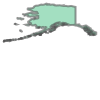

In [14]:
ak_mp = shapely.geometry.multipolygon.MultiPolygon(clean_ak)
ak_mp

In [15]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

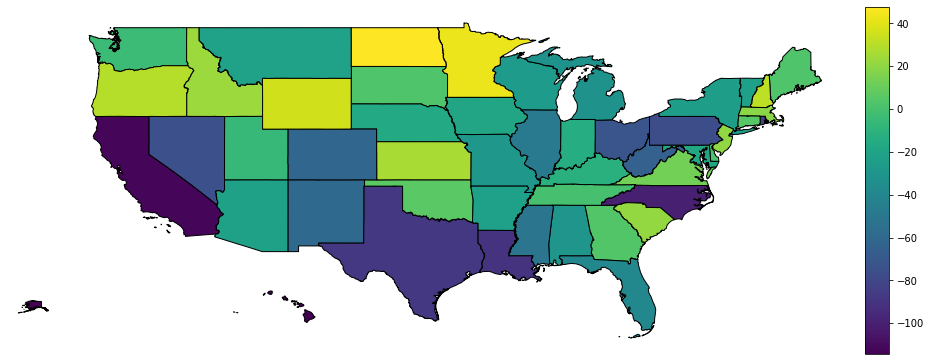

In [16]:
#Unemployment rate net change by state

fig, gax = plt.subplots(figsize=(15,15))
divider = make_axes_locatable(gax)
legend_ax = divider.append_axes('right', size='3%', pad=0.1)

lower_48.plot(ax = gax, column='One Month Net Change', edgecolor='black', legend=True, cax=legend_ax)

gax.axis('off')

# Creat the inset. 
# Plot Alaska on the inset axes. 

axins1 = inset_axes(gax, width='100%', height='100%',  bbox_to_anchor=(-.05, 0, 0.3, 0.3),
                   bbox_transform=gax.transAxes )

ak.plot(ax=axins1, column='One Month Net Change',edgecolor='black')
plt.axis('off')

# Creat the inset. 

axins2 = inset_axes(gax,width='100%', height='100%',  
                    bbox_to_anchor=(.25, .1, 0.1, 0.1),
                    bbox_transform=gax.transAxes )

hi.plot(ax=axins2, column='One Month Net Change',edgecolor='black')
plt.axis('off')

plt.savefig('us_umemployment.svg')

plt.show()

In [17]:
cons_sen = data.DataReader('UMCSENT', 'fred', start=dt.datetime(1990, 1, 1))

In [18]:
sp500 = data.DataReader('SP500', 'fred', start=dt.datetime(2010, 1, 1))

In [19]:
dow = data.DataReader('DJIA', 'fred', start=dt.datetime(2010, 1, 1))

In [20]:
nas = data.DataReader('NASDAQCOM', 'fred', start=dt.datetime(2010, 1, 1))

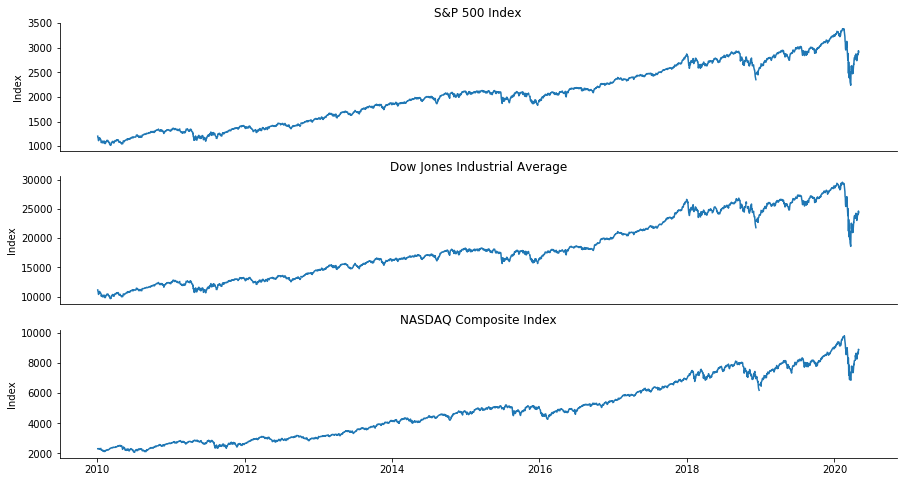

In [21]:
fig, ax = plt.subplots(nrows=3, figsize=(15, 8))

ax[0].plot(sp500.index, sp500['SP500'])
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)
ax[0].set_ylabel('Index')
ax[0].set_xticks([])
ax[0].set_title('S&P 500 Index')

ax[1].plot(dow.index, dow['DJIA'])
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].set_ylabel('Index')
ax[1].set_xticks([])
ax[1].set_title('Dow Jones Industrial Average')

ax[2].plot(nas.index, nas['NASDAQCOM'])
ax[2].spines['right'].set_visible(False)
ax[2].spines['top'].set_visible(False)
ax[2].set_ylabel('Index')
ax[2].set_title('NASDAQ Composite Index')

plt.savefig('D:/UW-Madison/SPRING 2020/ECON 570/Project/Plots/Stock Market.svg')

In [22]:
oil = data.DataReader('DCOILWTICO', 'fred', start=dt.datetime(2010, 1, 1))

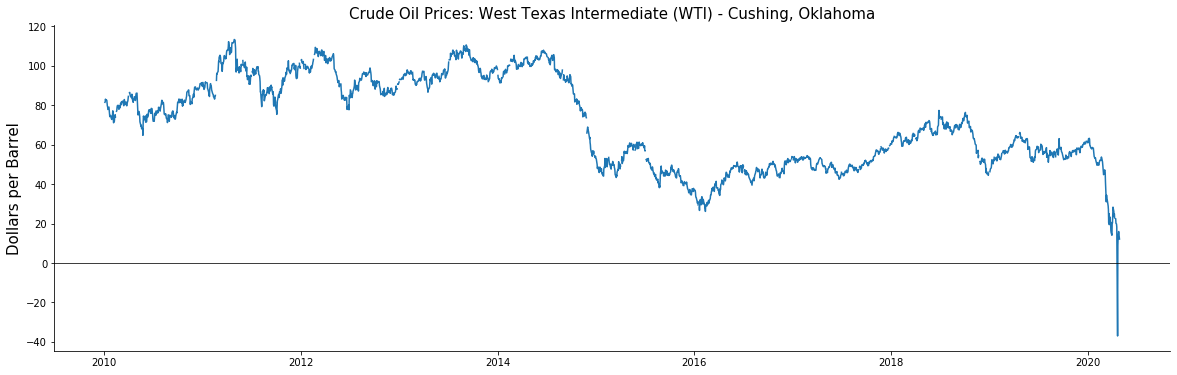

In [23]:
fig, ax = plt.subplots(figsize=(20, 6))

ax.plot(oil.index, oil['DCOILWTICO'])
ax.set_ylabel('Dollars per Barrel',fontsize=15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('Crude Oil Prices: West Texas Intermediate (WTI) - Cushing, Oklahoma',fontsize=15)
ax.axhline(y=0, color='black', linewidth=0.75)  
plt.savefig('D:/UW-Madison/SPRING 2020/ECON 570/Project/Plots/oil price.svg')

In [24]:
cons_sen = data.DataReader('UMCSENT', 'fred', start=dt.datetime(2000, 1, 1))

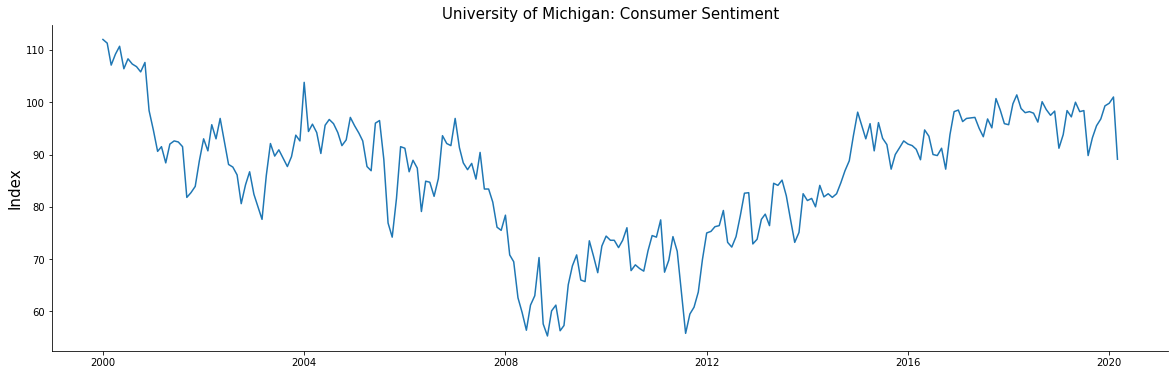

In [25]:
fig, ax = plt.subplots(figsize=(20, 6))

ax.plot(cons_sen.index, cons_sen['UMCSENT'])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_ylabel('Index', fontsize=15)
ax.set_title('University of Michigan: Consumer Sentiment', fontsize=15)

plt.savefig('D:/UW-Madison/SPRING 2020/ECON 570/Project/Plots/consumer sentiment.svg')

In [26]:
gdp = data.DataReader('GDPC1', 'fred', start=dt.datetime(2006, 1, 1))

In [27]:
gdp['quarterly_change'] = gdp['GDPC1'].pct_change() * 100

In [28]:
oo = gdp[gdp['quarterly_change']<0]

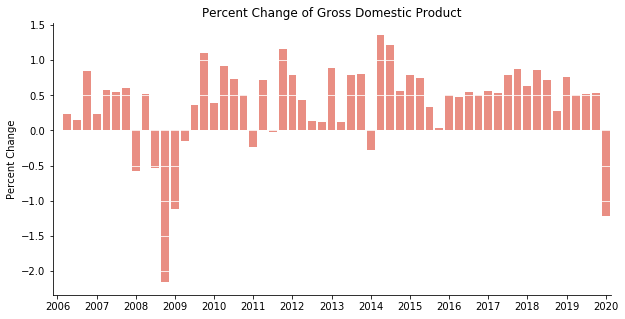

In [29]:
fig, ax = plt.subplots(figsize=(10,5))

sns.barplot(x=gdp.index, y = gdp['quarterly_change'], data=gdp, ax = ax, color='salmon')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xticks(range(0, len(gdp.index), 4))
ax.set_xticklabels(pd.date_range('2006', '2021', freq='1Y').year)
ax.grid(axis='y', color='white')

ax.set_ylabel('Percent Change')
ax.set_title('Percent Change of Gross Domestic Product')
ax.set_xlabel(None)
plt.savefig('D:/UW-Madison/SPRING 2020/ECON 570/Project/Plots/gdp.svg')